In [157]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [65]:
data = pd.read_csv('dataset_star.csv')
#1) How many training examples are available in the dataset?
num_training_examples = data.shape[0]
#A1. 240
data.shape

(240, 7)

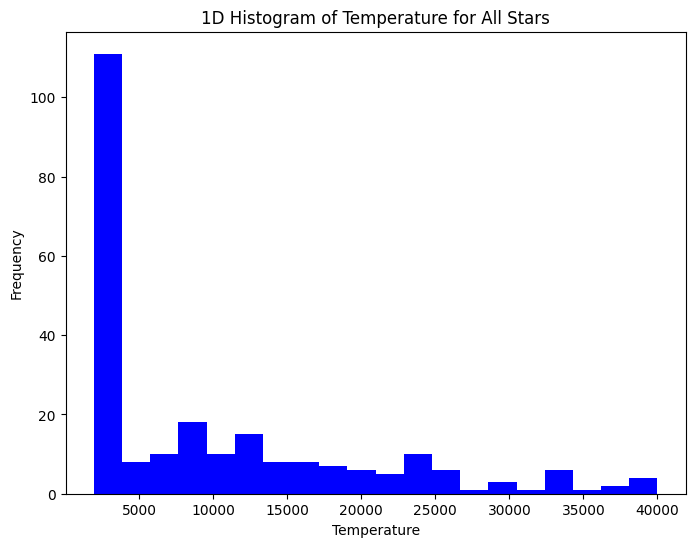

In [33]:
#2) Draw a 1D histogram of temperature for all stars.
plt.figure(figsize=(8, 6))
plt.hist(data['Temperature'], bins=20, color='blue')
plt.title('1D Histogram of Temperature for All Stars')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

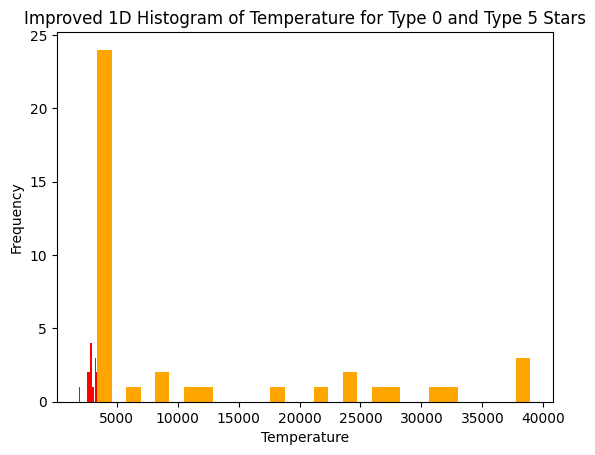

In [46]:
#3) Draw 1D histograms of temperature for type 0 and type 5 stars (overlayed)

# Filter data for type 0 and type 5 stars
type_0_stars = data[data['Type'] == 0]['Temperature']
type_5_stars = data[data['Type'] == 5]['Temperature']


# plt.figure(figsize=(8, 6))

plt.hist(type_0_stars, bins=30, color='red', alpha=1, label='Type 0', density=False)
plt.hist(type_5_stars, bins=30, color='orange', alpha=1, label='Type 5', density=False)

plt.title('Improved 1D Histogram of Temperature for Type 0 and Type 5 Stars')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
# plt.legend()
plt.show()


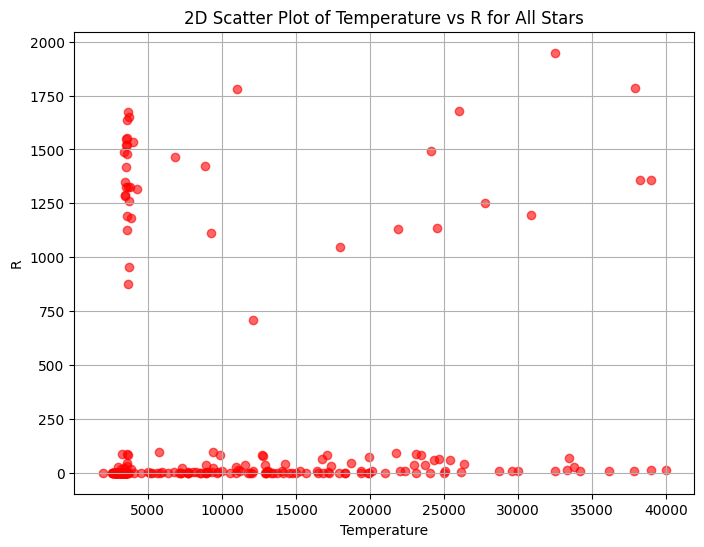

In [10]:
# 4. Draw a 2D scatter plot of temperature (X-axis) vs R (Y-axis) for all stars

plt.figure(figsize=(8, 6))
plt.scatter(data['Temperature'], data['R'], color='red', alpha=0.6)
plt.title('2D Scatter Plot of Temperature vs R for All Stars')
plt.xlabel('Temperature')
plt.ylabel('R')
plt.grid(True)
plt.show()


In [49]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


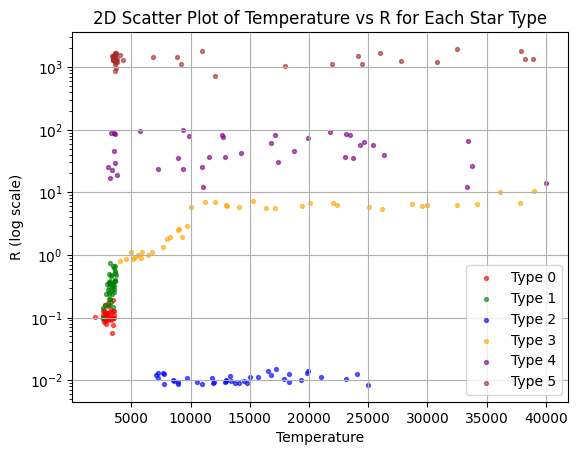

In [57]:
# 5. Draw 2D scatter plots of temperature (X-axis) vs R (Y-axis) for each star type on the same canvas

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']
types = sorted(data['Type'].unique()) 

# plot each star type with a different color
for i in range(len(types)):
    star_data = data[data['Type'] == types[i]]
    plt.scatter(star_data['Temperature'], star_data['R'], color=colors[i], label=f'Type {i}', alpha=0.6, s = 8)

# logarithmic scale on Y-axis for better readability
plt.yscale('log')

plt.title('2D Scatter Plot of Temperature vs R for Each Star Type')
plt.xlabel('Temperature')
plt.ylabel('R (log scale)')
plt.legend()
plt.grid(True)
plt.show()


In [72]:
#Q6
data['Color_cat'] = pd.Categorical(data['Color']).codes
data['Spectral_Class_cat'] = pd.Categorical(data['Spectral_Class']).codes
#changes made: mapped the color code to int, 
#            : mapped the spectral class to int, 
# further preprocessing (normalising temperature, L, R)

In [81]:
data.head()

,Temperature,L,R,A_M,Type,Color_cat,Spectral_Class_cat
1,3042,0.000500,0.1542,16.60,0,8,5
2,2600,0.000300,0.1020,18.70,0,8,5
3,2800,0.000200,0.1600,16.65,0,8,5
4,1939,0.000138,0.1030,20.06,0,8,5
5,2840,0.000650,0.1100,16.98,0,8,5


In [80]:
data = data.drop(['Spectral_Class', 'Color'], axis = 1)

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split


X = data
X = X.drop(['Type'], axis = 1)
y = data['Type']

In [125]:
X

,Temperature,L,R,A_M,Color_cat,Spectral_Class_cat
1,-0.783087,-0.599068,-0.459439,16.60,8,5
2,-0.829320,-0.599068,-0.459540,18.70,8,5
3,-0.808400,-0.599068,-0.459428,16.65,8,5
4,-0.898460,-0.599068,-0.459538,20.06,8,5
5,-0.804216,-0.599068,-0.459524,16.98,8,5
...,...,...,...,...,...,...
235,2.971816,1.487100,2.157961,-9.93,0,6
236,2.124458,4.042907,1.845227,-10.63,0,6
237,-0.177771,2.392423,2.287302,-10.73,9,0
238,-0.135304,1.654681,1.686930,-11.23,9,0


In [136]:
y = to_categorical(y, num_classes=6)

In [127]:
X

,Temperature,L,R,A_M,Color_cat,Spectral_Class_cat
1,-0.783087,-0.599068,-0.459439,16.60,8,5
2,-0.829320,-0.599068,-0.459540,18.70,8,5
3,-0.808400,-0.599068,-0.459428,16.65,8,5
4,-0.898460,-0.599068,-0.459538,20.06,8,5
5,-0.804216,-0.599068,-0.459524,16.98,8,5
...,...,...,...,...,...,...
235,2.971816,1.487100,2.157961,-9.93,0,6
236,2.124458,4.042907,1.845227,-10.63,0,6
237,-0.177771,2.392423,2.287302,-10.73,9,0
238,-0.135304,1.654681,1.686930,-11.23,9,0


In [128]:
X['L'] = (X['L'] - X['L'].mean())/X['L'].std()
X['R'] = (X['R'] - X['R'].mean())/X['R'].std()
X['Temperature'] = (X['Temperature'] - X['Temperature'].mean())/X['Temperature'].std()

In [129]:
#Q7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train test has been split into 80-20

In [130]:
X_train

,Temperature,L,R,A_M,Color_cat,Spectral_Class_cat
139,-0.730892,-0.599068,-0.459243,14.33,8,5
61,-0.742293,-0.599068,-0.459370,16.94,8,5
208,0.773140,-0.599068,-0.459716,11.66,0,1
166,0.982652,0.246909,-0.318814,-5.69,0,6
207,1.314127,-0.599068,-0.459717,10.18,0,1
...,...,...,...,...,...,...
107,0.247320,0.425010,-0.390240,-6.34,0,6
15,-0.751917,-0.599068,-0.459273,13.07,8,5
93,-0.580374,-0.599066,-0.457555,4.78,12,4
180,-0.805158,-0.599068,-0.459560,16.21,8,5


In [192]:
#Q8 NN with 2 Hidden layers, 1 input 1 output
model = Sequential()
model.add(Dense(16, input_dim=6, activation='relu'))
model.add(Dense(8, input_dim=16,activation='relu'))
model.add(Dense(6, activation='softmax'))
#Q10: used categorical cross entropy loss and softmax for output activation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Recall()])

history = model.fit(X_train, y_train, 
                    epochs=80, 
                    batch_size=16, 
                    validation_data=(X_test, y_test))

Epoch 1/80


/Users/rohakdebnath/Desktop/PHY654/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1338 - loss: 4.9701 - recall_17: 0.1195 - val_accuracy: 0.2917 - val_loss: 3.6050 - val_recall_17: 0.2500
Epoch 2/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2661 - loss: 3.8163 - recall_17: 0.2306 - val_accuracy: 0.2708 - val_loss: 3.0726 - val_recall_17: 0.2500
Epoch 3/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2546 - loss: 3.0609 - recall_17: 0.2511 - val_accuracy: 0.2708 - val_loss: 2.6963 - val_recall_17: 0.2292
Epoch 4/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2476 - loss: 2.7474 - recall_17: 0.2326 - val_accuracy: 0.2708 - val_loss: 2.3859 - val_recall_17: 0.2500
Epoch 5/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3177 - loss: 2.1985 - recall_17: 0.2700 - val_accuracy: 0.3333 - val_loss: 2.1341 - val_recall_17: 0.2500
Epoch 6/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3368 - loss: 2.0873 - recall_17: 0.2591 - val_accuracy: 0.3542 - val_loss: 1.8996 - val_recall_1

In [189]:
model.summary()
#Q9: Weights and Biases calculation : w = 272, b = 30

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 16)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 6)              │            54 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 908 (3.55 KB)

 Trainable params: 302 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 606 (2.37 KB)

In [193]:
#Q11 done prediction on the dataset provided
y_act = np.argmax(y_test, axis = 1)
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis = 1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [194]:
y_pred_label

array([2, 0, 3, 5, 4, 5, 2, 2, 1, 2, 4, 2, 5, 4, 5, 5, 0, 1, 4, 0, 0, 2,
       5, 3, 5, 3, 1, 0, 5, 3, 3, 3, 2, 0, 1, 1, 3, 5, 2, 1, 4, 5, 3, 1,
       3, 0, 4, 3])

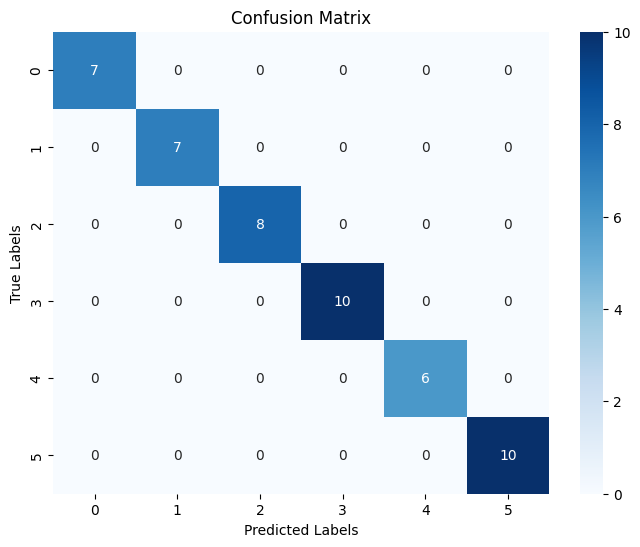

In [195]:
#Q12 plot of confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_act, y_pred_label)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [196]:
#Q13 overall accuracy of model

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_act, y_pred_label)
print(f'Overall Accuracy: {accuracy:.3f}')

Overall Accuracy: 1.000


In [198]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'recall_17', 'val_accuracy', 'val_loss', 'val_recall_17'])

In [199]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']  

recall_values = history.history['recall_17']
val_recall_values = history.history['val_recall_17']

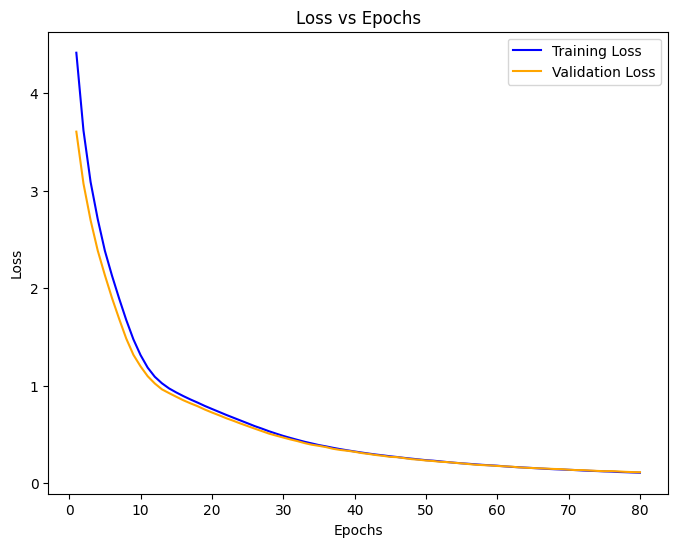

In [200]:
#Q14 plot of loss vs epochs

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss_values, label='Training Loss', color='blue')
plt.plot(epochs, val_loss_values, label='Validation Loss', color='orange')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

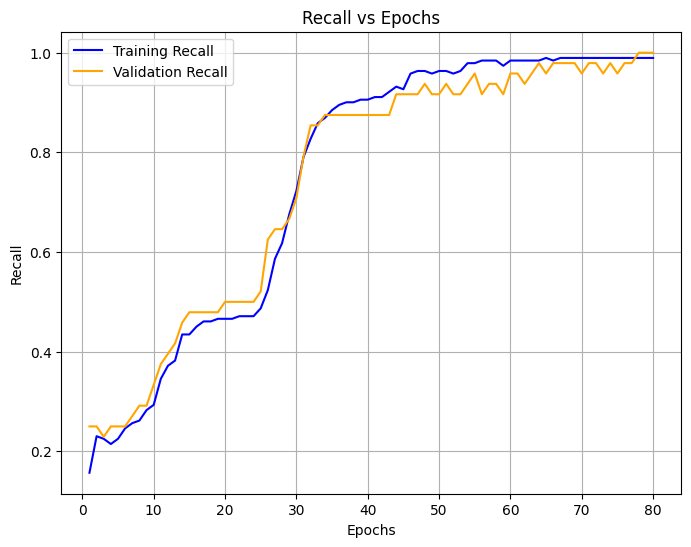

In [201]:
#Q15 plot of recall vs epochs

plt.figure(figsize=(8, 6))
plt.plot(epochs, recall_values, label='Training Recall', color='blue')
plt.plot(epochs, val_recall_values, label='Validation Recall', color='orange')
plt.title('Recall vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()